# Домашнее задание по теме:

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install pandas matplotlib numpy seaborn -y

In [3]:
# !pip install imbalanced-learn

In [4]:
import numpy as np

np.__version__

'1.19.2'

In [5]:
import pandas as pd

pd.__version__

'1.2.3'

In [6]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [7]:
import seaborn as sns

sns.__version__

'0.11.1'

In [8]:
import imblearn

imblearn.__version__

'0.8.0'

## Загрузка данных

[Источник (Hotel booking demand)](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

[Описание колонок](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005)

ВНИМАНИЕ: Предварительно датасет необходимо скачать к себе на локальный компьютер.

In [9]:
# загрузить датасет в pandas dataframe
df = pd.read_csv("./../../data/hotel_bookings.csv")

# показать все колонки
pd.options.display.max_columns = None

# вывести первые 5 и последние 5 строк
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Анализ графических данных

- Предположим, что модель будет предсказывать результаты колонки `is_repeated_guest`.


- Проанализировать содержание колонки `is_repeated_guest`:
    - Используя график `seaborn.countplot` показать соотношение значений.
    - Вычислить процент соотношения значений (сколько процентов `True` и `False` в этой колонке).
    - Насколько сильно не сбалансирован дата сет?


In [10]:
def plot_cat_count_s(cs: pd.Series):
    """
    Функция для рисования countplot для Series
    """
    
    # создать график (сетка 1x1)
    fig, ax = plt.subplots(1, 1, figsize=(6, 1.5))
    
    # получить цветовую карту с учетом количества графиков
    cmap = plt.get_cmap('hsv')
    
    # индивидуальный цвет для каждого графика
    plot_color = cmap(0)

    # создать countplot
    g = sns.countplot(x=cs, 
                      ax=ax, 
                      color=plot_color)

    # повернуть подписи категорий на 45 градусов
    g.set_xticklabels(g.get_xticklabels(), 
                      rotation=45, 
                      horizontalalignment='right')

    # отключить подпись оси x и y
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)

    # наименование графика справа цветом графика
    ax.set_title(cs.name, 
                 loc='right', 
                 fontsize=15, 
                 color=plot_color)

    # включить сетку на графике
    ax.grid()

    # сколько всего записей для всех категорий в колонке
    total = len(cs)
    
    print(f"{total} ({cs.name})")

    # для каждого столбца на графике сверху добавить процент
    for p in ax.patches:
        # вычислить процент, который соответствует текущему столбцу
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)

        # начало (слева) столбца на графике по оси x
        x_pos = p.get_x()

        # верх столбца на графике по оси x
        y_pos = p.get_y() + p.get_height()

        # добавить процент в качестве аннотации к столбцу
        ax.annotate(percentage, 
                    xy=(x_pos, y_pos), 
                    fontsize=15)

119390 (is_repeated_guest)


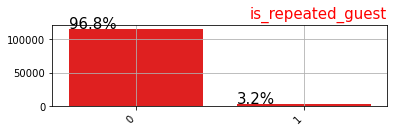

In [11]:
plot_cat_count_s(df.is_repeated_guest)

## Подготовка данных

- Разделить дата сет на две части:
    - `X` - все колонки кроме `is_repeated_guest`.
    - `y` - только колонка `is_repeated_guest`

**ВНИМАНИЕ:** колонка `is_repeated_guest` не последняя, важно правильно ее "вырезать" (допустим любой работающий способ).

In [12]:
X = df.loc[:, df.columns != 'is_repeated_guest']
X

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [13]:
y = df.is_repeated_guest
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_repeated_guest, Length: 119390, dtype: int64

## Oversampling

- Используя класс `RandomOverSampler` из пакета `imbalanced-learn` преобразовать `X` и `y` таким образом, чтобы класс меньшинства получил 75% примеров по сравнению с классом большинства. То есть в результате должно быть примерно такое соотношение: `57.1`/`42.9`.

- Вычислить насколько больше стало записей в дата сете после этого преобразования. Какие есть идеи по этому поводу? Много это или мало?

202265 (is_repeated_guest)


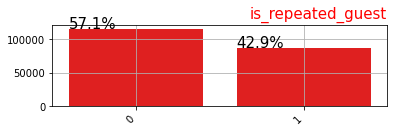

In [14]:
over_sample = imblearn.over_sampling.RandomOverSampler(sampling_strategy=0.75)
X_over, y_over = over_sample.fit_resample(X, y)
plot_cat_count_s(y_over)

In [15]:
len(y_over) - len(y)

82875

## Oversampling

- Используя класс `RandomUnderSampler` из пакета `imbalanced-learn` преобразовать `X` и `y` таким образом, чтобы их соотношение стало 50/50.

- Вычислить насколько меньше стало записей в дата сете после этого преобразования. Какие есть идеи по этому поводу? Много это или мало?

7620 (is_repeated_guest)


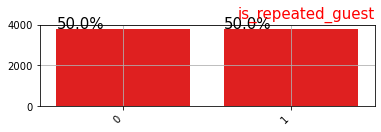

In [16]:
under_sample = imblearn.under_sampling.RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = under_sample.fit_resample(X, y)
plot_cat_count_s(y_under)

In [17]:
len(y) - len(y_under)

111770